# Análise de Dados Financeiros com Python

## Bibliotecas importadas

In [36]:
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Obtenção dos dados

In [27]:
ticker = 'AAPL'
start='2020-01-27'
end='2021-01-27'

In [28]:
data = yf.download(
    tickers=ticker, 
    start=start, 
    end=end, 
    progress=False
)

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898636,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045761,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679443,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563988,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036224,199588400


In [30]:
data.to_csv('data/aapl.csv')

Cálculo do preço de fechamento normalizado

In [31]:
norm = data['Close'] / data['Close'].iloc[0]

In [32]:
norm

Date
2020-01-27    1.000000
2020-01-28    1.028289
2020-01-29    1.049814
2020-01-30    1.048293
2020-01-31    1.001813
                ...   
2021-01-20    1.709403
2021-01-21    1.772067
2021-01-22    1.800550
2021-01-25    1.850396
2021-01-26    1.853504
Name: Close, Length: 253, dtype: float64

In [33]:
data['Daily Chg'] = data['Close'] - data['Open']
data['Normalized'] = norm

In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898636,161940000,-0.277496,1.000000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045761,162234000,1.272499,1.028289
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679443,216229200,-0.027504,1.049814
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563988,126743200,0.832497,1.048293
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036224,199588400,-2.854996,1.001813


## Visualizações gráficas

In [40]:
datetime.strftime(data.index[0], "%d/%m/%Y")

'27/01/2020'

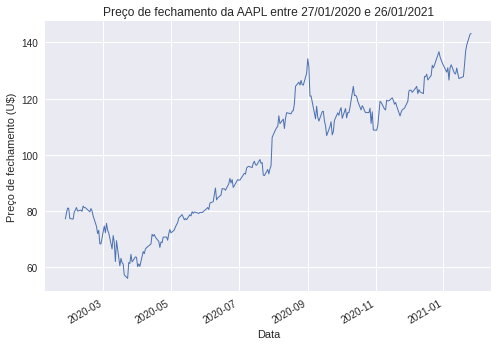

In [45]:
fig, ax =  plt.subplots()
data['Close'].plot(ax=ax, lw=1)
ax.set_title(f'Preço de fechamento da {ticker} entre {datetime.strftime(data.index[0], "%d/%m/%Y")} e {datetime.strftime(data.index[-1], "%d/%m/%Y")}')
ax.set_ylabel('Preço de fechamento (U$)')
ax.set_xlabel('Data')
plt.show()

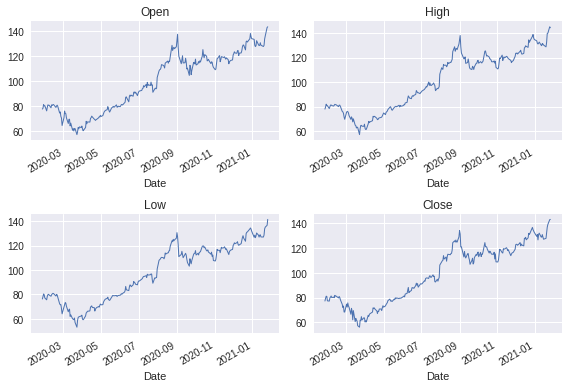

In [48]:
fig, ax =  plt.subplots(2,2)
data['Open'].plot(ax=ax[0,0], lw=1, title='Open')
data['High'].plot(ax=ax[0,1], lw=1, title='High')
data['Low'].plot(ax=ax[1,0], lw=1, title='Low')
data['Close'].plot(ax=ax[1,1], lw=1, title='Close')
plt.tight_layout()
plt.show()